In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')

In [3]:

def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out

def reshape_RF(arr):
    arr_RF = arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    return arr_RF

In [4]:

X_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz'))["y"]
y_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz'))["dist"]

X_val = np.load(os.path.join(data_folder,'Xy_val_dist.npz'))["y"]
y_val = np.load(os.path.join(data_folder, 'Xy_val_dist.npz'))["dist"]
X_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz'))["y"]
y_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz'))["dist"]

In [9]:

X_train_cut = cut_X(X_train)
X_train_RF = reshape_RF(X_train_cut)
X_test_cut = cut_X(X_test)
X_test_RF = reshape_RF(X_test_cut)

In [24]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [7]:
logisticRegr = LogisticRegression()

In [8]:
logisticRegr.fit(X_train_RF, y_train)

/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
preds = logisticRegr.predict(X_test_RF)

In [21]:
from sklearn.metrics import mean_squared_error, confusion_matrix

In [13]:
mean_squared_error(y_test, preds)

0.0

In [14]:
X_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["y"]
y_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["dist"]

X_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["y"]
y_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["dist"]

X_15mm = np.load(os.path.join(data_folder, "Xy_15mm.npz"))["y"]
y_15mm = np.load(os.path.join(data_folder, "Xy_15mm.npz"))["dist"]

X_20mm = np.load(os.path.join(data_folder, "Xy_20mm.npz"))["y"]
y_20mm = np.load(os.path.join(data_folder, "Xy_20mm.npz"))["dist"]

X_30mm = np.load(os.path.join(data_folder, "Xy_30mm.npz"))["y"]
y_30mm = np.load(os.path.join(data_folder, "Xy_30mm.npz"))["dist"]

X_35mm = np.load(os.path.join(data_folder, "Xy_35mm.npz"))["y"]
y_35mm = np.load(os.path.join(data_folder, "Xy_35mm.npz"))["dist"]

In [15]:
X_1mm_cut = cut_X(X_1mm)
X_3mm_cut = cut_X(X_3mm)
X_15mm_cut = cut_X(X_15mm)
X_20mm_cut = cut_X(X_20mm)
X_30mm_cut = cut_X(X_30mm)
X_35mm_cut = cut_X(X_35mm)

X_1mm_RF  = reshape_RF(X_1mm_cut)
X_3mm_RF  = reshape_RF(X_3mm_cut)
X_15mm_RF  = reshape_RF(X_15mm_cut)
X_20mm_RF  = reshape_RF(X_20mm_cut)
X_30mm_RF  = reshape_RF(X_30mm_cut)
X_35mm_RF  = reshape_RF(X_35mm_cut)

In [19]:
X_new = np.vstack((X_1mm_RF, X_3mm_RF, X_15mm_RF,
                X_20mm_RF, X_3mm_RF, X_35mm_RF))

In [18]:
y_new = np.hstack((y_1mm, y_3mm, y_15mm,
                  y_20mm, y_30mm, y_35mm))

In [22]:
new_preds = logisticRegr.predict(X_new)

In [23]:
confusion_matrix(y_new, new_preds)

array([[  0, 300,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  93,   0, 207,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 300,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 300,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  93,   0, 207,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 300,   0,   0]])

In [25]:

lireg = LinearRegression()
lireg.fit(X_train_RF, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
lireg.score(X_train_RF, y_train)

1.0

In [27]:
pred_lireg = lireg.predict(X_test_RF)

In [28]:
mean_squared_error(y_test, pred_lireg)

0.016055751078923094

In [30]:
pred_lireg

array([25.07588385,  9.96933706,  1.99006857,  3.99688919,  2.0014466 ,
       24.87119189,  3.88147691, 24.88794575,  3.97533751, 10.06588251,
       10.04917876,  2.01817358,  1.99959348,  9.97050817,  2.13651623,
        1.94721907,  4.01383507, 10.02358028,  9.96067566,  3.97047953,
        3.95562357,  9.91573294, 10.12078044,  4.0684399 ,  2.00587077,
        2.1102118 , 10.10268966,  3.9562631 ,  3.86445626,  3.98832455,
        4.11421457, 10.04652286,  9.94779302,  9.99699335,  4.03160496,
        3.99854687,  3.99677484,  2.00105001,  4.05599697, 10.03941667,
       25.04691495,  2.00817183, 24.96216561,  4.04649943, 24.60580333,
        4.18192047,  4.16150448,  2.01989371,  1.98314971,  1.97932271,
        9.96237469, 24.93612279,  3.9914733 ,  1.99736267, 24.98971205,
        4.00818013, 24.76969528, 25.0706693 , 24.98802979,  4.01134004,
        4.06447482,  2.002751  ,  2.21483815,  2.00444846,  1.96627474,
       25.01906557,  1.91411088,  4.01311604,  3.96734967,  4.15

/users/yw18581/.conda/envs/fluffy-bunnies/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


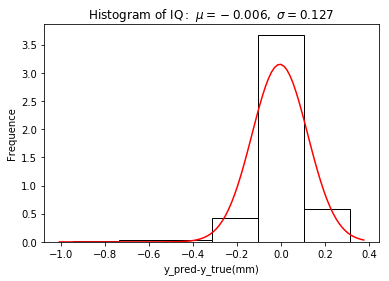

In [40]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = pred_lireg-y_test
mean,std=norm.fit(data)

plt.hist(data, bins=6, normed=True, facecolor='white',edgecolor ="k",  alpha=1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, c='r')
plt.xlabel('y_pred-y_true(mm)')
plt.ylabel('Frequence')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, std))
plt.show()

In [42]:
pred_new_lireg_500 = lireg.predict(X_new[:500])

In [43]:
pred_new_lireg_1000 = lireg.predict(X_new[500:1000])

In [44]:
pred_new_lireg_1500 = lireg.predict(X_new[1000:1500])

In [45]:
pred_new_lireg_1800 = lireg.predict(X_new[1500:1800])

In [46]:
pred_new_lireg = np.hstack((pred_new_lireg_500, pred_new_lireg_1000, 
                            pred_new_lireg_1500, pred_new_lireg_1800))

In [47]:
mean_squared_error(pred_new_lireg, y_new)

135.0585363677929